In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 1.​​Create​ ​a ​​multivariate​ ​time​ ​series; ​​perform ​​any​ ​interpolations.​​​​

**Dependent variable**: helppoor_pct (%people who think that the government should do everything possible to improve the standard of living of all poor Americans).

**Independent variables**:
1. year
2. age
3. income
4. ba_pct (%people with a BA or higher degree)
5. liberal_pct (%people who think they are liberals)

In [ ]:
# Grab the data that we need
gss = pd.read_csv("trends-gss.csv")
variables = ["year", "helppoor", "age", "degree", "realinc", "polviews"]
sub = gss[variables].copy()

In [ ]:
# Recode variables and create indicator variables
sub['nhelppoor'] = np.where(sub['helppoor'] <= 2, 1, 0)
sub['baplus'] = np.where(sub['degree'] >= 3, 1, 0)
sub['liberal'] = np.where(sub['polviews'] <= 3, 1, 0)
sub['income'] = sub['realinc']

In [ ]:
# Get means by year
by_year = sub.groupby('year', as_index = False).agg('mean').replace({0.000000: np.nan})

In [ ]:
# Add additional years to the dataframe by creating a separate dataframe for the new years
add_years_df = pd.DataFrame(data = pd.Series([1979, 1981, 1992, 1995] + list(np.arange(1997, 2012, 2))),
                            columns = ['year'])

# Append them to the original dataframe
by_year = pd.concat([by_year, add_years_df], sort = False, ignore_index = True)

In [ ]:
by_year = by_year.sort_values('year')
by_year = by_year.set_index("year", drop = False)

# Interpolate missing values of time series linearly
by_year_ts = by_year.interpolate(method = 'linear')

In [ ]:
# Drop na values from 1972 and in essence, the whole row because it's values cannot be interpolated
by_year_ts=by_year_ts.dropna()

In [ ]:
# Convert to percentage terms
by_year_ts['helppoor_pct'] = by_year_ts['nhelppoor']*100
by_year_ts['ba_pct'] = by_year_ts['baplus']*100
by_year_ts['liberal_pct'] = by_year_ts['liberal']*100

### 2.​​Graph​​ the ​​relationships ​​between​ ​X ​​and ​​Y.​ ​Explain ​​how ​​you ​​think ​​Y ​​should ​​relate​ ​to ​​your ​​key​ ​Xs.​​​​

In [ ]:
# Graph correlation between time series
corr_vars = ['helppoor_pct', 'ba_pct', 'liberal_pct', 'age', 'income', 'year']
by_year_ts[corr_vars].corr()

,helppoor_pct,ba_pct,liberal_pct,age,income,year
helppoor_pct,1.000000,-0.872764,0.401635,-0.594757,-0.683411,-0.843903
ba_pct,-0.872764,1.000000,-0.224805,0.829282,0.699829,0.977158
liberal_pct,0.401635,-0.224805,1.000000,0.061170,-0.523861,-0.174176
age,-0.594757,0.829282,0.061170,1.000000,0.534446,0.878680
income,-0.683411,0.699829,-0.523861,0.534446,1.000000,0.668669
year,-0.843903,0.977158,-0.174176,0.878680,0.668669,1.000000


<Axes: >

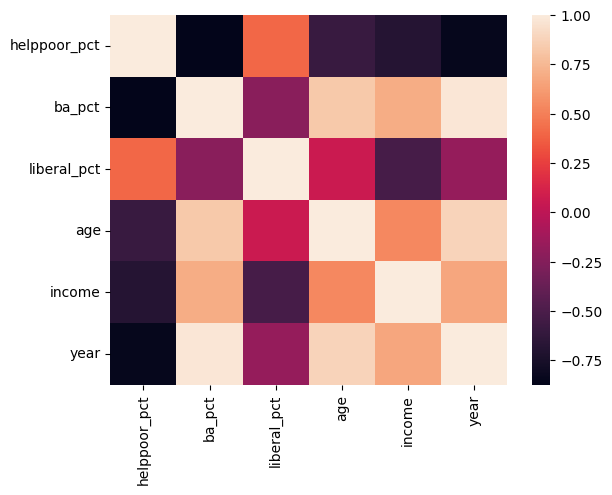

In [ ]:
sns.heatmap(by_year_ts[corr_vars].corr())

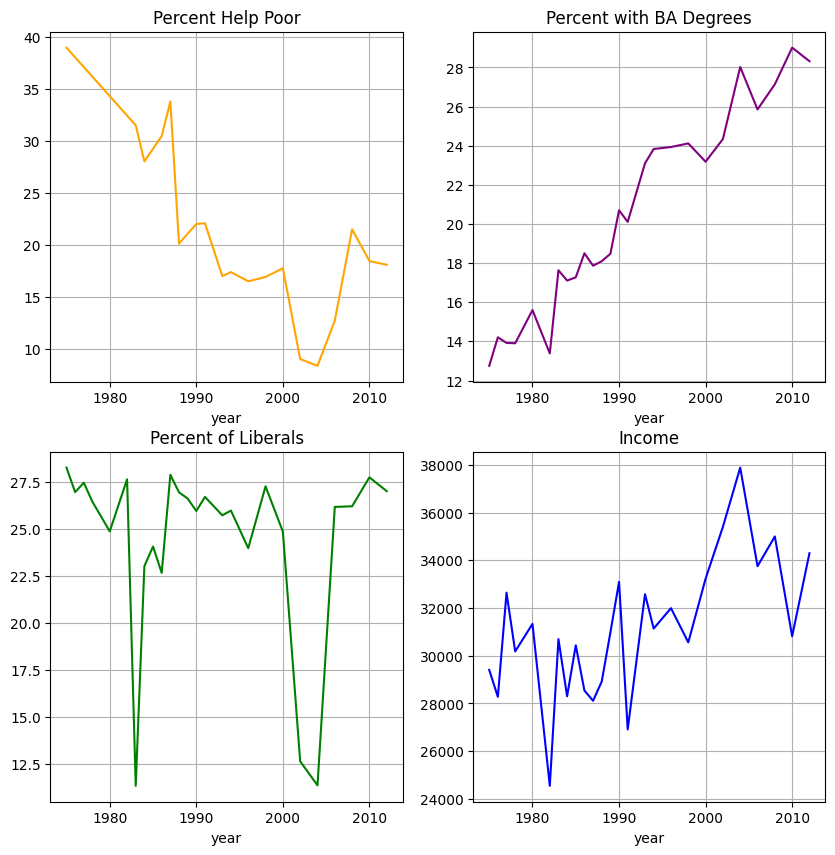

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

by_year_ts['helppoor_pct'].plot(title = 'Percent Help Poor', color = 'orange', ax = axes[0,0], grid = True)
by_year_ts['ba_pct'].plot(title = 'Percent with BA Degrees', color = 'purple', ax = axes[0,1], grid = True)
by_year_ts['liberal_pct'].plot(title = 'Percent of Liberals', color = 'g', ax = axes[1,0], grid = True)
by_year_ts['income'].plot(title = 'Income', color = 'b', ax = axes[1,1], grid = True)

plt.show()

According to the above graphs, we can see that my dependent variable Y which is the percent of people who think the government should help poors has a decreasing trend over years. I think it is negatively associated with the percent of people who have a BA or higher degree. People with higher education levels may lean toward ideologies that emphasize individual responsibility and limited government intervention.

Moreover, I think that the percent of people who think the government should help poors is positively associated with the percent of people who are liberal, even though the graphs don't show an obvious relationship between them. If a person is liberal, he or she may advocate for government intervention.

If we see the trend on income, while it also doesn't show an obvious relationship with the percent of people who think the government should help poors, we can see a gradual increase in income, which shows a negative correlation with the dependent variable Y. People who are richer may also lean toward ideologies that emphasize individual responsibility.

### ​​3.​​Run​ ​a ​​simple​​ time ​​series​ ​regression,​ ​with​ ​one ​​X ​​and ​​no​ ​trend. ​​​​Interpret​ ​it.​​​​

In [ ]:
lm_hpp = smf.ols('helppoor_pct ~ ba_pct', data = by_year_ts).fit()
lm_hpp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           helppoor_pct   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     115.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           9.21e-13
Time:                        19:34:13   Log-Likelihood:                -109.83
No. Observations:                  38   AIC:                             223.7
Df Residuals:                      36   BIC:                             226.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.7126      3.177     17.537      0.000      49.269      62.156
ba_pct        -1.5510      0.145    -10.728      0.000      -1.844      -1.258
==============================================================================
Omnibus:                        1.030   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                0.918
Skew:                           0.147   Prob(JB):                        0.632
Kurtosis:                       2.298   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the above regression, for each percent increase in people with a BA or higher degree, there is on average a -1.55 percent decrease in people who think the government should help poors. It is highly statistically significant with a p-value smaller than 0.001.
The r-sq is pretty high at 0.76, which means that 76% of the variation in people who think the government should help poors is explained by educational levels. However, these high R-sq values are deceptive because of aggregation bias. The model ignores a lot of individual variances.

### 4.​​Run​ ​a​ ​time ​​series ​​regression ​​with​ ​one​ ​X​ ​and​ ​trend.​​​ ​Interpret​ ​it.​​​ ​Perform​ ​autocorrelation ​​diagnostics. Explain ​​what​ ​you​ ​found.​​​​

In [ ]:
lm_hpp2 = smf.ols('helppoor_pct ~ ba_pct + year', data = by_year_ts).fit()
lm_hpp2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           helppoor_pct   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     56.49
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.10e-11
Time:                        19:34:13   Log-Likelihood:                -109.69
No. Observations:                  38   AIC:                             225.4
Df Residuals:                      35   BIC:                             230.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -257.4731    613.058     -0.420      0.677   -1502.047     987.101
ba_pct        -1.8942      0.687     -2.755      0.009      -3.290      -0.499
year           0.1608      0.315      0.511      0.613      -0.478       0.800
==============================================================================
Omnibus:                        0.699   Durbin-Watson:                   0.602
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.711
Skew:                           0.033   Prob(JB):                        0.701
Kurtosis:                       2.333   Cond. No.                     1.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the above regression, for each percent increase in people with a BA or higher degree, there is on average a -1.89 percent decrease in people who think the government should help poors. It is statistically significant with a p-value less than 0.05.

And with every year, the percent of people who think the government should help poors increases by 0.16 on average. It is not statistically significant with a p-value much higher than 0.05.

The r-sq is also high at 0.76, which means that 76% of the variation in people who think the government should help poors is explained by the independent variables in this model.

**Test for heteroscedasticity using Breuschgpagan Test**

In [ ]:
from statsmodels.compat import lzip

name = ['BP', 'p-value', 'f-value', 'f p-value']
test2 = sm.stats.diagnostic.het_breuschpagan(lm_hpp2.resid, lm_hpp2.model.exog)
lzip(name, test2)

[('BP', 10.792531043721361),
 ('p-value', 0.004533479549506884),
 ('f-value', 6.941817835706419),
 ('f p-value', 0.0028895455816381624)]

The p-value is less than 0.05, proving that the test result is significant and the null hypothesis is not true. Therefore, heteroscedasticity is present in this model.

**Test for autocorrelation**

In [ ]:
from statsmodels.tsa.stattools import acf

err2 = lm_hpp2.resid
acf(err2)

array([ 1.00000000e+00,  6.69938724e-01,  3.86708219e-01,  3.05745440e-01,
        1.70655173e-01, -1.23882715e-01, -1.90593871e-01, -1.38509677e-01,
       -1.83952360e-01, -1.77911809e-01, -8.81416369e-02, -1.79809755e-02,
       -4.05890939e-02, -1.60515410e-02,  5.30581280e-04, -1.05676237e-01])

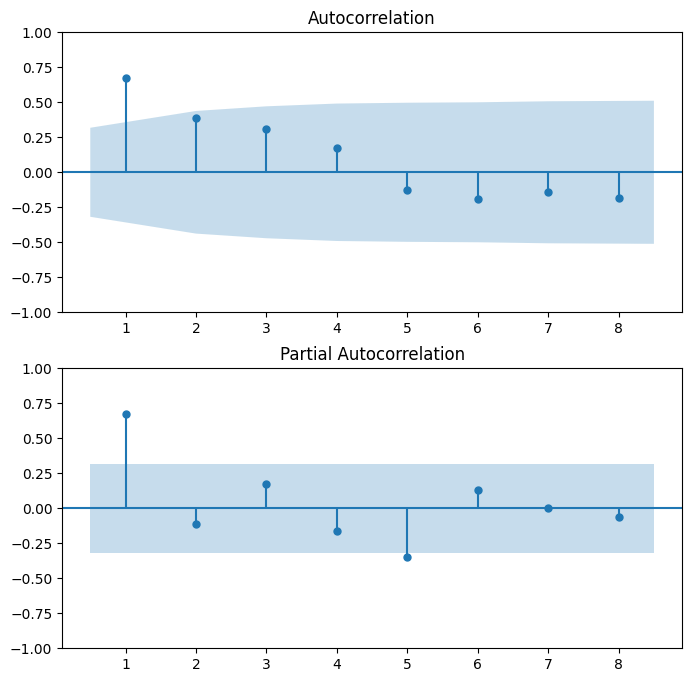

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(err2, lags = 8, zero = False, ax=ax[0]);
plot_pacf(err2, lags = 8, zero = False, ax=ax[1]);
plt.show()

According to the above plots, we can see that the first lag value extends a lot beyond the confidence interval bend, indicating the presence of a first-order autocorrelation in this model.

In [ ]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

print('Durbin Watson statistic:', durbin_watson(err2))

lmtest2, pval2, fval2, f_pval2 = acorr_breusch_godfrey(lm_hpp2, nlags = 1)
print('LM test =', lmtest2)
print('p-value =', pval2)

Durbin Watson statistic: 0.6016217905489245
LM test = 19.29694274694769
p-value = 1.1188535680702836e-05


According to Breusch Godfrey Test, since the p-value is less than 0.001, the test result is highly statistically significant and we reject the null hypothesis, indicating the presence of autocorrelation in this model.

### ​​5.​​Consider ​​running​ ​a ​​time ​​series ​​regression ​​with​ ​many ​​Xs ​​and​ ​trend.​​​​ Interpret ​​that.​​​ ​Check​ ​VIF.​​​​

In [ ]:
lm_hpp3 = smf.ols('helppoor_pct ~ age + ba_pct + liberal_pct + year', data = by_year_ts).fit()
lm_hpp3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           helppoor_pct   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     43.33
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.09e-12
Time:                        19:43:00   Log-Likelihood:                -102.26
No. Observations:                  38   AIC:                             214.5
Df Residuals:                      33   BIC:                             222.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     856.5894    607.608      1.410      0.168    -379.597    2092.776
age             3.4867      1.319      2.643      0.012       0.803       6.171
ba_pct         -1.1051      0.615     -1.796      0.082      -2.357       0.147
liberal_pct     0.2457      0.152      1.618      0.115      -0.063       0.555
year           -0.4896      0.326     -1.500      0.143      -1.154       0.175
==============================================================================
Omnibus:                        0.073   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.284
Skew:                          -0.012   Prob(JB):                        0.868
Kurtosis:                       2.577   Cond. No.                     1.95e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the above regression, for each higher age, there is on average a 3.48 percent increase in people who think the government should help poors, net of other factors. It is statistically significant with a p-value less than 0.05.

Moreover, for each percent increase in people with a BA or higher degree, there is on average a -1.10 percent decrease in people who think the government should help poors, net of other factors. It is not statistically significant with a p-value higher than 0.05.

For each percent increase in liberal people, there is on average a 0.24 percent increase in people who think the government should help poors, net of other factors. It is not statistically significant with a p-value higher than 0.05.

And with every year, the percent of people who think the government should help poors on average decreases by -0.49, net of other factors. It is not statistically significant with a p-value higher than 0.05.

The r-sq is pretty high at 0.84. This means that 84% of the variation in people who think the government should help poors is explained by the independent variables in this model.

**Check for multicollinearity with VIF test**

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('helppoor_pct ~ age + ba_pct + liberal_pct + year',
                 data = by_year_ts, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIR Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.iloc[1:]

,VIR Factor,features
1,5.763103,age
2,24.729862,ba_pct
3,1.332163,liberal_pct
4,33.214882,year


According to the above results, we can conclude that the problem of multicollinearity exists among the variables. The VIR Factor for the percent of people with a BA or higher degree is 24.73, and the VIR Factor for year is 33.21. These high values of the VIR Factor indicate multicollinearity in variables ba_pct and year. In this scenario, the variables inflate each other's effects. In comparison, age and the percent of liberal people have a low value of the VIR Factor.

### ​6.​​Run​ ​a​ ​first ​​differenced​ ​time​​ series ​​regression.​​​ ​Interpret​ ​that.

In [ ]:
by_yearFD = pd.DataFrame()

by_yearFD = by_year_ts[['helppoor_pct', 'age', 'ba_pct', 'liberal_pct']]
by_yearFD = by_yearFD.diff()

by_yearFD['year'] = by_year_ts['year']

In [ ]:
lm_hpp4 = smf.ols('helppoor_pct ~ ba_pct + year', data = by_yearFD).fit()
lm_hpp4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           helppoor_pct   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.8052
Date:                Thu, 14 Dec 2023   Prob (F-statistic):              0.455
Time:                        19:34:14   Log-Likelihood:                -91.310
No. Observations:                  37   AIC:                             188.6
Df Residuals:                      34   BIC:                             193.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -105.1072     91.707     -1.146      0.260    -291.479      81.264
ba_pct        -0.2115      0.453     -0.467      0.644      -1.133       0.710
year           0.0525      0.046      1.141      0.262      -0.041       0.146
==============================================================================
Omnibus:                       39.347   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.568
Skew:                          -2.351   Prob(JB):                     4.50e-34
Kurtosis:                      11.804   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the above regression, for a 1 point increase in the difference of the percent of people with a BA or higher degree, on average there is a -0.21 point decrease in the difference of the percent of people who think the government should help poors. It is not statistically significant with a p-value higher than 0.05.

Moreover, with every year, there is on average a 0.05 point increase in the difference of the percent of people who think the government should help poors. It is not statistically significant with a p-value higher than 0.05.

 The r-sq is very low and has dropped down to 0.04 from 0.84. This means that 4% of the variation in people who think the government should help poors is explained by the independent variables in this model. This reduction is because we took first differences and eliminated problems like bias.

### 7.​​Check ​​your​​ variables​ ​for​ ​unit ​​roots.​​​ ​Do ​​some ​​tests.​​​ ​Interpret ​​them.​​​​

In [ ]:
!pip install arch

In [ ]:
from arch.unitroot import ADF, PhillipsPerron, DFGLS

ADF(by_year_ts['helppoor_pct'], lags = int(4*(len(by_year_ts)/100)**(2/9)), trend = 'c')

Test Statistic,-1.828
P-value,0.366
Lags,3


According to the Augmented Dickey-Fuller test, we can see that the p-value is 0.366, which is greater than 0.05 and means that there are unit roots present in the helppoor_pct time series process.

In [ ]:
DFGLS(by_year_ts['helppoor_pct'], lags = int(4*(len(by_year_ts)/100)**(2/9)), trend = 'c')

Test Statistic,-0.624
P-value,0.462
Lags,3


According to the Dickey-Fuller Generalised Least Squares, we can see that the p-value is 0.462, which is greater than 0.05 and means that there are unit roots present in the helppoor_pct time series process.

In [ ]:
PhillipsPerron(by_year_ts['helppoor_pct'], lags = 3)

Test Statistic,-1.827
P-value,0.367
Lags,3


According to the Phillips-Perron test, we can see that the p-value is 0.367, which is greater than 0.05 and means that there are unit roots present in the helppoor_pct time series process.

### 8.​​Perform​ ​an​ ​Automatic​ ​ARIMA ​​on​ ​the ​​residuals​​ from​ ​one ​​of ​​your ​​earlier​ ​models.​​​ ​Tell ​​me​ ​what ​​it​ ​says.

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
import warnings

warnings.filterwarnings("ignore")
auto_arima(err2, trace = True, test='kpss', information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=215.950, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=226.658, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=206.277, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=211.438, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=223.021, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : BIC=209.723, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=209.420, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=212.763, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=202.727, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : BIC=206.146, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=205.827, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=207.808, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : BIC=209.185, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.694 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

According to the above analysis, the best model to use would be ARIMA(1,0,0)(0,0,0)[0], which is a simple autoregressive model where the current value of the time series is linearly dependent on its immediately preceding value. It has a BIC of 206.277 and an intercept is supposed to be included.

### 9.​​Run ​​an ​​ARIMA​ ​that ​​follows​ ​from​ ​Step​ ​8. ​​​​Interpret​ ​that, ​​too.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

by_year_ts['intercept'] = 1
arima_hpp = SARIMAX(endog = by_year_ts['helppoor_pct'], order = (0, 0, 1),
                      exog = by_year_ts[['ba_pct', 'year', 'intercept']]).fit(trend = 'nc')

In [ ]:
arima_hpp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           helppoor_pct   No. Observations:                   38
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -100.203
Date:                Thu, 14 Dec 2023   AIC                            210.405
Time:                        19:34:37   BIC                            218.593
Sample:                             0   HQIC                           213.319
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ba_pct        -1.8385      0.753     -2.441      0.015      -3.315      -0.362
year           0.1602      0.323      0.496      0.620      -0.472       0.793
intercept   -257.4692    627.877     -0.410      0.682   -1488.086     973.147
ma.L1          0.6216      0.152      4.082      0.000       0.323       0.920
sigma2        11.4512      3.070      3.730      0.000       5.434      17.468
===================================================================================
Ljung-Box (L1) (Q):                   2.31   Jarque-Bera (JB):                 3.62
Prob(Q):                              0.13   Prob(JB):                         0.16
Heteroskedasticity (H):               1.63   Skew:                            -0.65
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

According to the above analysis, for a 1 point increase in the percent of people with a BA or higher degree, on average there is a -1.83 point decrease in the percent of people who think the government should help poors. It is statistically significant with a p-value less than 0.05.

Moreover, with every year, there is on average a 0.16 point increase in the percent of people who think the government should help poors. It is not statistically significant with a p-value higher than 0.05.

The BIC value is higher in this analysis at a value of 218.593 compared to what was returned in Q8, because we are running exogenous variables through the model.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(arima_hpp.resid, boxpierce = True, lags = round((len(by_year_ts)/2-2), 0))

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,2.394341,0.121775,2.214765,0.136696
2,7.088410,0.028892,6.439427,0.039967
3,7.982510,0.046375,7.221765,0.065155
4,11.146847,0.024962,9.911451,0.041946
5,12.417647,0.029492,10.959861,0.052182
6,12.874709,0.045069,11.325511,0.078822
7,12.973791,0.072750,11.402300,0.122008
8,13.884843,0.084817,12.085589,0.147426
9,14.519155,0.105019,12.545465,0.184275
10,14.753523,0.141310,12.709522,0.240369


Here, we can see that some of the p-values of both tests are statistically significant, which shows that there is autocorrelation.